In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] == 300

False

# Data Exploration

In [2]:
# reading the dataset
df = pd.read_csv(r"..\Data\house_prices.csv")

In [3]:
# looking at the data
display(df.head(5),df.sample(5),df.tail(5))

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
12604,Super built-up Area,Ready To Move,Bhagyalakshmi Avenue,1 BHK,Prineth,540,1.0,2.0,24.00
4885,Super built-up Area,Ready To Move,Babusapalaya,3 BHK,ARngsd,1358,2.0,1.0,43.10
8701,Super built-up Area,18-Dec,Whitefield,2 BHK,Prtates,1216,2.0,1.0,75.00
8120,Super built-up Area,Ready To Move,Whitefield,2 BHK,SSthamh,1140,2.0,2.0,40.00
12671,Super built-up Area,18-May,Sarjapur Road,2 BHK,PualeSk,1346,2.0,1.0,69.61


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
# checking the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Inference:**

- there are 13320 records with 8 columns.
- total_sqft, bath, balcony, price are the float64 values rest are of object data type.
- there seem to have misssing values in the data.

In [5]:
# checking the central tencendy of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


**Inference:**

- There is a posibility of outliers as there is property with 40 number of baths which is extremely rare. Every property has minimum 1 bathrom with average of 2 bathrooms.
- There number of balcony varies from minimum 0 to maximum 3.
- The price column is not interpretable at the moment.

# Data Cleaning:

In [6]:
# checking for missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- We will be dropping availiblity, area_type, and society columns as they will not help to predict prices and overall predictive ability.

- we will be droping society column as well, as it have too many missing values.

- we will be treating the other columns as required.

In [7]:
df = df.drop(['availability','area_type','society','balcony'],axis = 1)

We will be droping the other columns missing values as they are small in number.

In [8]:
# droping the na values
df = df.dropna()
# checking the data
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

We can see some inconsistency in size column. We will be checking the same for other columns as well.

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [13]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [14]:
# creating new column with just the number of bedrooms and adding it in the dataset
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
# droping the orignal size column 
df = df.drop(['size'],axis = 1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In the total_sqft column there are values containing the ranges of so we will be avaeraging the range and work with the mean value.

In [15]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [16]:
df[~df['total_sqft'].apply(is_float)].sample(5)

,location,total_sqft,bath,price,bhk
4884,Electronic City Phase II,888 - 1290,2.0,32.670,2
4226,Whitefield,524 - 894,1.0,34.385,1
8477,Hosa Road,615 - 985,1.0,39.990,1
6987,Chandapura,598 - 958,2.0,25.290,2
7797,Begur Road,2462 - 2467,6.0,118.000,4


In [17]:
# creating a function tp avergae the ranges 

def convert_sqft(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
# applying the function and storing it 
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.sample(5)

,location,total_sqft,bath,price,bhk
11525,Rajiv Gandhi Nagar,1293.0,2.0,80.00,2
4022,Babusapalaya,1050.0,2.0,45.00,2
8755,Kanakpura Road,1240.0,2.0,65.00,2
8034,Talaghattapura,2273.0,3.0,159.00,3
4288,Bhoganhalli,1053.4,3.0,88.91,3


In [19]:
# dropping these values as well
display(df.shape)
df = df.dropna()
df.shape

(13246, 5)

(13200, 5)

In [20]:

df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
# looking at all the records that have more than 20 bedrooms
df[df['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000.0,27.0,230.0,27
4684,Munnekollal,2400.0,40.0,660.0,43


If we look above we the the area of 43 and 27 bhk are way to less to acomodate 43 rooms with 40 bathrooms and 27 rooms with 27 bathrooms. so we will romove such descripancies as well.  

In [22]:

print(df.shape)
# removing all the column that have discrepencies in total_sqft
df = df[~(df['total_sqft']/df['bhk']<450)]
df.shape


(13200, 5)


(10627, 5)

In [23]:
# creating the price per sqft column
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.sample(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
4965,4th Phase JP Nagar,2250.0,5.0,360.0,5,16000.000000
13127,Kanakpura Road,1665.0,3.0,74.9,3,4498.498498
10929,Hebbal Kempapura,1436.0,2.0,75.0,3,5222.841226
1733,Jnanabharathi Layout,2400.0,3.0,142.0,4,5916.666667
9680,Kaikondrahalli,991.0,2.0,64.0,2,6458.123108


In [24]:

#We can certainly perform some dimensionality reduction on location column because as for a categorical column, 
# it has a lot of distinct values
df.location.nunique()

1088

In [25]:

# So we can classify those locations as other locations
location_grouped = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
other_locations = location_grouped[location_grouped<=10]

In [26]:

display(df.location.nunique())
df.location = df.location.apply(lambda x: 'other' if x in other_locations else x)
df.location.nunique()

1088

194


Now we have 194 column, which is good because when converting it into categorical data, we won't have to deal with 1000 new columns, 200 is much more managable

# Outlier Treatment

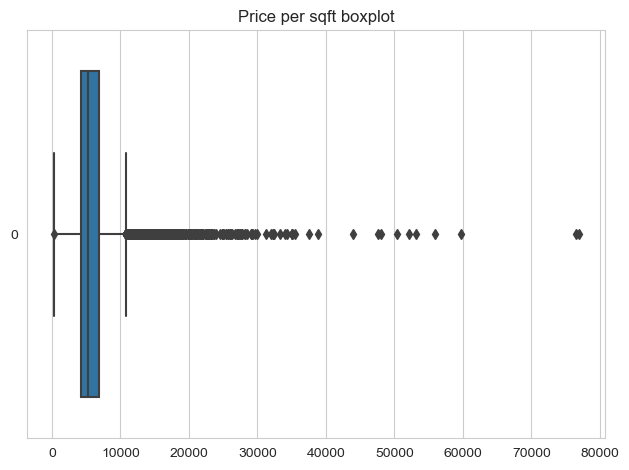

In [27]:
sns.boxplot(df['price_per_sqft'], orient='h')
plt.title('Price per sqft boxplot')
plt.tight_layout()
plt.show()

There are heafty amount of outliers in the price_per_sqft column we will be treaing it by using Isolation Forest.

In [55]:
X = df[['total_sqft','bath','price','bhk','price_per_sqft']]

In [56]:
# fitting the model
iso = IsolationForest(contamination = 0.2)
preds = iso.fit_predict(X)


c:\Users\PRANJAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [57]:
# Add outlier predictions to the data
df['outlier'] = preds

In [58]:
# Filter and print outliers
outliers = df[df['outlier'] == -1]
print("Outliers using Isolation Forest:")
print(outliers)

Outliers using Isolation Forest:
               location  total_sqft  bath  price  bhk  price_per_sqft  outlier
1      Chikka Tirupathi      2600.0   5.0  120.0    4     4615.384615       -1
7          Rajaji Nagar      3300.0   4.0  600.0    4    18181.818182       -1
11           Whitefield      2785.0   5.0  295.0    4    10592.459605       -1
18                other      2770.0   4.0  290.0    3    10469.314079       -1
20              Kengeri       600.0   1.0   15.0    1     2500.000000       -1
...                 ...         ...   ...    ...  ...             ...      ...
13305          Hulimavu       500.0   1.0  220.0    1    44000.000000       -1
13315        Whitefield      3453.0   4.0  231.0    5     6689.834926       -1
13316             other      3600.0   5.0  400.0    4    11111.111111       -1
13318   Padmanabhanagar      4689.0   4.0  488.0    4    10407.336319       -1
13319      Doddathoguru       550.0   1.0   17.0    1     3090.909091       -1

[2126 rows x 7 col

In [59]:
outliers.count()

location          2126
total_sqft        2126
bath              2126
price             2126
bhk               2126
price_per_sqft    2126
outlier           2126
dtype: int64

In [66]:
df.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft,outlier
9600,Kenchenahalli,1165.0,2.0,45.0,2,3862.660944,1
2584,other,2720.0,4.0,485.0,4,17830.882353,-1
424,Hoodi,985.0,2.0,67.0,2,6802.030457,1
4983,Yelachenahalli,1080.0,2.0,38.0,2,3518.518519,1
5991,Thubarahalli,1216.0,2.0,80.0,2,6578.947368,1
3939,Thigalarapalya,1418.0,2.0,103.0,2,7263.751763,1
8024,AECS Layout,1308.0,2.0,60.0,2,4587.155963,1
1848,Hulimavu,1758.0,3.0,65.0,3,3697.383390,1
12701,Hegde Nagar,1835.0,3.0,89.0,3,4850.136240,1
2986,Frazer Town,2350.0,4.0,285.0,3,12127.659574,-1


In [71]:
# Filter and drop outliers
df_cleaned = df[df['outlier'] == 1].copy()  # Keep only inliers
df_cleaned.drop(columns=['outlier'], inplace=True)  # Drop the 'outlier' column

    

In [72]:
df_cleaned

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...
13309,Yeshwanthpur,1675.0,3.0,92.13,3,5500.298507
13310,Rachenahalli,1050.0,2.0,52.71,2,5020.000000
13312,Bellandur,1262.0,2.0,47.00,2,3724.247227
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245


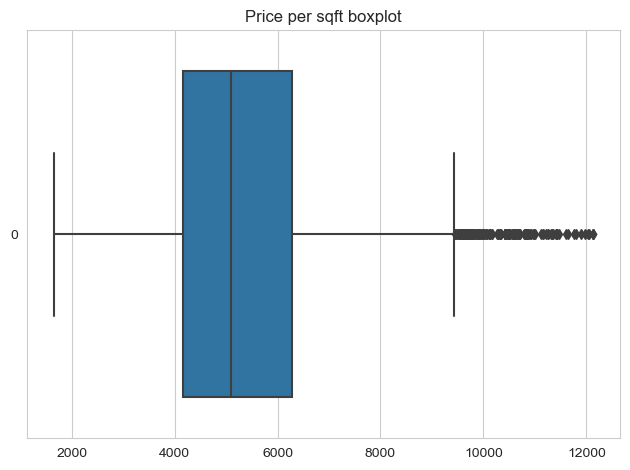

In [74]:
sns.boxplot(df_cleaned['price_per_sqft'], orient='h')
plt.title('Price per sqft boxplot')
plt.tight_layout()
plt.show()

In [75]:
df_cleaned

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', '7th Phase JP Nagar', 'Gottigere', 'Sarjapur',
       'Mysore Road', 'Raja Rajeshwari Nagar', 'other', 'Kengeri',
       'Binny Pete', 'Thanisandra', 'Bellandur', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Electronics City Phase 1',
       'Kundalahalli', 'Murugeshpalya', 'Kanakpura Road', 'Doddathoguru',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Gunjur', 'Marathahalli', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'EPIP Zone',
       'Kasavanhalli', 'Sanjay nagar', 'Electronic City', 'Domlur',
       'Yeshwanthpur', 'Nagarbhavi', 'Devanahalli', 'Ramamurthy Nagar',
       'Sarjapur  Road', 'Malleshwaram', 'Akshaya Nagar', 'Kadugodi',
       'Hormavu', 'Kudlu Gate', '8th Phase JP Nagar', 'Anandapura',
       'Kannamangala

In [80]:
df_cleaned.head().sort(df['location'])

AttributeError: 'DataFrame' object has no attribute 'sort'

In [86]:
df_cleaned.query("location == '1st Phase JP Nagar'")

,location,total_sqft,bath,price,bhk,price_per_sqft
2106,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
3481,1st Phase JP Nagar,2024.0,3.0,157.0,3,7756.916996
3669,1st Phase JP Nagar,2059.0,3.0,225.0,3,10927.634774
4605,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148
5497,1st Phase JP Nagar,1077.0,2.0,93.0,2,8635.097493
6465,1st Phase JP Nagar,1590.0,3.0,131.0,3,8238.993711
7416,1st Phase JP Nagar,2180.0,3.0,210.0,3,9633.027523
8299,1st Phase JP Nagar,1180.0,2.0,88.5,2,7500.000000
8625,1st Phase JP Nagar,1200.0,2.0,86.0,2,7166.666667
10224,1st Phase JP Nagar,1394.0,2.0,85.0,2,6097.560976
